## [Pratical Python and Opencv](https://www.pyimagesearch.com/practical-python-opencv/) Chapter 8 - 9

### Smoothing & Blurring
- blurring is useful for tasks such as edge detection and thresholding, where outline is more important than noise

In [1]:
import cv2
import matplotlib.pyplot as plt
from IPython.html import widgets

%matplotlib inline

/home/hukim/.virtualenvs/tf1.2p2/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


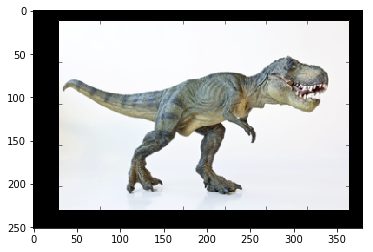

In [3]:
trex = cv2.imread("data/trex.png")[:,:,::-1]
plt.imshow(trex)

### 1. bluring by averaging
- sliding a k x k sliding window, where k is always an odd number
- its implemented as convolution kernel
- use cv.blur(img, (w_width, w_height))

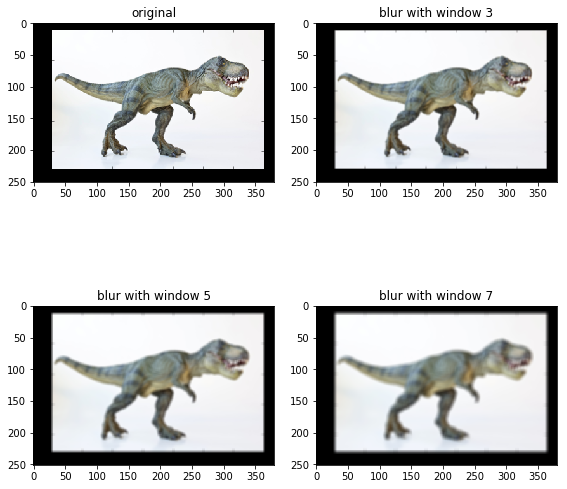

In [4]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
fig.tight_layout()
axes = axes.ravel()
axes[0].set_title("original")
axes[0].imshow(trex)
for i, k in enumerate([3, 5, 7], 1):
    axes[i].imshow(cv2.blur(trex, (k, k)))
    axes[i].set_title("blur with window %i" % k)

###2. Blurring by Gaussian
- use cv2.GaussianBlur(img, (kernelWidth, kernelHeight), sigma)
- set sigma = 0 will ask cv2 to calculate the std based on kernel size
- because it is a weighted sum based filter, the contract on the edges are better perseved

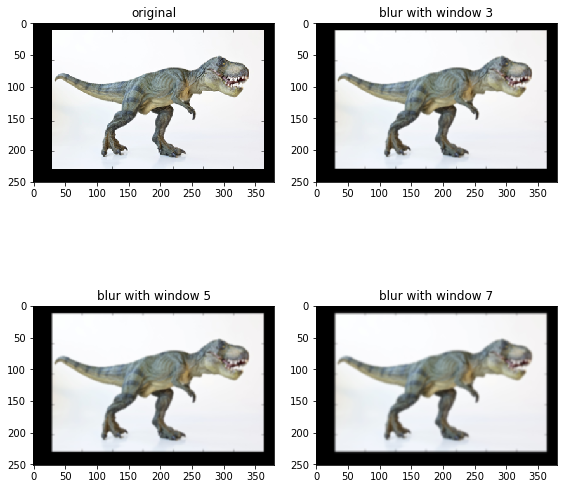

In [5]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
fig.tight_layout()
axes = axes.ravel()
axes[0].set_title("original")
axes[0].imshow(trex)
for i, k in enumerate([3, 5, 7], 1):
    axes[i].imshow(cv2.GaussianBlur(trex, (k, k), 0))
    axes[i].set_title("blur with window %i" % k)

### 3. Blurring by median filter
- known as most effective for removing salt and pepper noise
- the boundary information is much better perserved
- unlike "mean based" blurring where there is a "motion blur" effect, here it removes details and noise
- use cv2.medianBlur(img, k) - ***k is an integer instead of an integer tuple like in other blur method! WHY???***

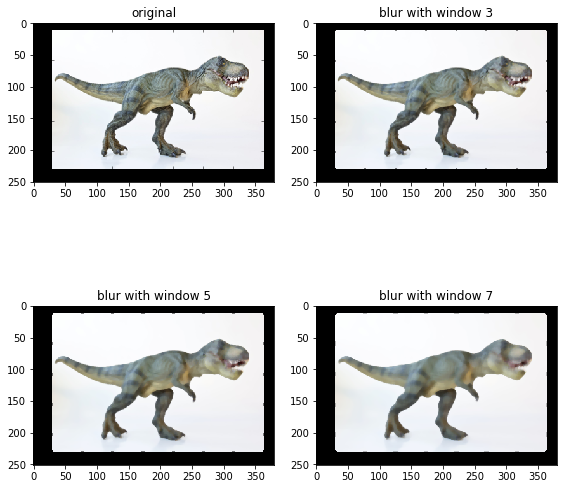

In [6]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
fig.tight_layout()
axes = axes.ravel()
axes[0].set_title("original")
axes[0].imshow(trex)
for i, k in enumerate([3, 5, 7], 1):
    axes[i].imshow(cv2.medianBlur(trex, k))
    axes[i].set_title("blur with window %i" % k)

### 4. blurring by bilatreal
- it uses two gaussian filters, one for coordinate space closeness, one for density space closeness
- so its effect is to weighted-mean of near and similiar pixels in a neighborhood
- it is slow compared to other blurring method
- but it is good at reducing noise as well as maintain edge information
- now look at the details of the ribs of the t-rex
- [opencvdoc](http://docs.opencv.org/doc/tutorials/imgproc/gausian_median_blur_bilateral_filter/gausian_median_blur_bilateral_filter.html) and [article](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html)

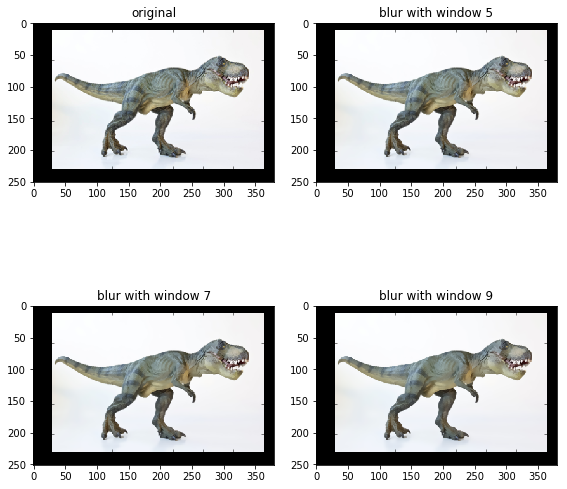

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
fig.tight_layout()
axes = axes.ravel()
axes[0].set_title("original")
axes[0].imshow(trex)
for i, (k,spatial_sigma, color_sigma) in enumerate([(5, 21, 21), (7, 31, 31), (9, 41, 42)], 1):
    axes[i].imshow(cv2.bilateralFilter(trex, k, spatial_sigma, color_sigma, ))
    axes[i].set_title("blur with window %i" % k)

## Thresholding
- most of time applicable only to gray scale

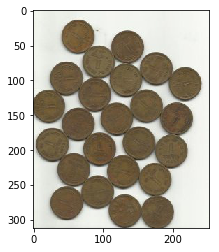

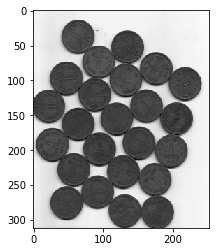

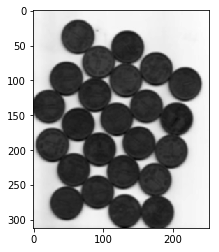

In [8]:
coins = cv2.imread("data/coins.jpg")[:,:,::-1]
plt.imshow(coins)


coins_gray = cv2.cvtColor(coins, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(coins_gray, cmap = plt.cm.gray)

gaussian_coins = cv2.GaussianBlur(coins_gray, (5, 5), 0)
plt.figure()
plt.imshow(gaussian_coins, cmap = plt.cm.gray)

### 1. simple threasholding
- **usually involves using histogram to find a threshold of interest**
- the binarized images are 0/255
- **usually it's a good idea to use filter to reduced noise BEFORE THRESHOLDING, as it reduceds small unconnected parts**

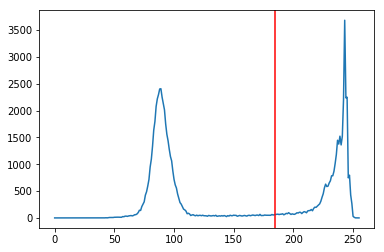

In [9]:
coin_hist = cv2.calcHist([coins_gray], [0], None, [256], [0, 256])
plt.plot(coin_hist)
plt.axvline(185, color = "red")

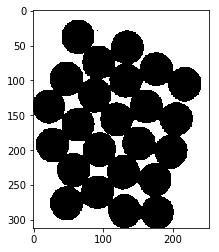

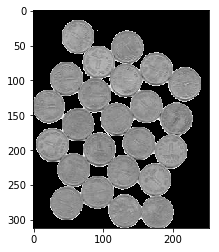

In [10]:
thr, binary_coins = cv2.threshold(coins_gray, 155, 255, cv2.THRESH_BINARY)
plt.imshow(binary_coins, cmap  = plt.cm.gray)
thr, mask = cv2.threshold(coins_gray, 155, 255, cv2.THRESH_BINARY_INV)
masked_coins = cv2.bitwise_and(coins_gray, coins_gray, mask = mask)
plt.figure()
plt.imshow(masked_coins, cmap = plt.cm.gray)

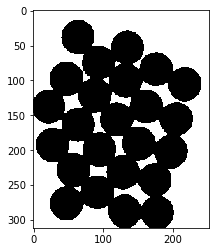

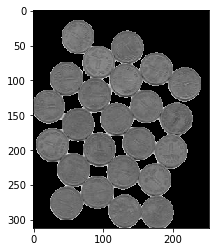

In [11]:
## TRY reduce the noise first
## simple filtering has IMPROVED THE RESULT


thr, binary_coins = cv2.threshold(gaussian_coins, 155, 255, cv2.THRESH_BINARY)
plt.imshow(binary_coins, cmap  = plt.cm.gray)
thr, mask = cv2.threshold(gaussian_coins, 155, 255, cv2.THRESH_BINARY_INV)
masked_coins = cv2.bitwise_and(coins_gray, coins_gray, mask = mask)
plt.figure()
plt.imshow(masked_coins, cmap = plt.cm.gray) 

### 2. adaptive thresholding
- sometimes having one global threshold T is NOT enough
- adaptive thresholding considers small neighbors of pixelsand then finds an optimal threshold value T for each neighbor.
- suitable for cases cases where there may be dramatic ranges of pixel intensities and the optimal value of T may change for different parts of the image.
- **You need to experiment with parameters such as block size and C (fine tuning)**
- [opencv doc](http://docs.opencv.org/trunk/doc/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)

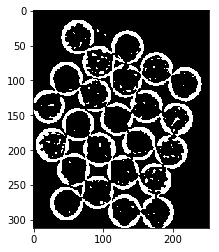

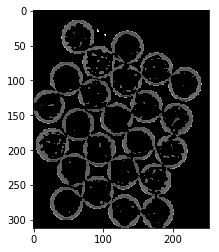

In [12]:
mask = cv2.adaptiveThreshold(gaussian_coins, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)
plt.imshow(mask, cmap = plt.cm.gray)
plt.figure()
plt.imshow(cv2.bitwise_and(coins_gray, coins_gray, mask = mask), cmap = plt.cm.gray)

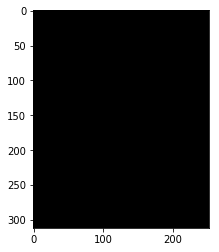

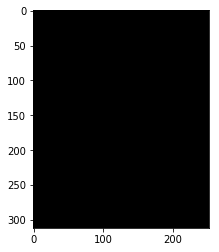

<function __main__.plot_gaussian_adaptive_thr>

In [13]:
def plot_gaussian_adaptive_thr(K, C):
    mask = cv2.adaptiveThreshold(gaussian_coins, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, K, C, )
    plt.imshow(mask, cmap = plt.cm.gray)
    plt.figure()
    plt.imshow(cv2.bitwise_and(coins_gray, coins_gray, mask = mask), cmap = plt.cm.gray)
    
widgets.interact(plot_gaussian_adaptive_thr, K = (1, 251, 2), C = (1, 251, 2))

### 3. Otsu thresholding
- Otsu’s method assumes there are two peaks in the grayscale histogram of the image. In then tries to find an optimal value to separate these two peaks – thus our value of T.

In [14]:
import mahotas as mh
T = mh.otsu(coins_gray, )
print T

162


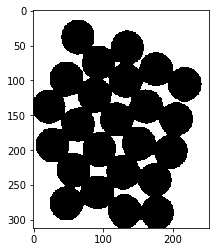

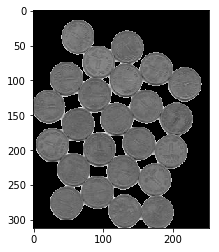

In [15]:
thr, binary_coins = cv2.threshold(gaussian_coins, T, 255, cv2.THRESH_BINARY)
plt.imshow(binary_coins, cmap  = plt.cm.gray)
thr, mask = cv2.threshold(gaussian_coins, T, 255, cv2.THRESH_BINARY_INV)
masked_coins = cv2.bitwise_and(coins_gray, coins_gray, mask = mask)
plt.figure()
plt.imshow(masked_coins, cmap = plt.cm.gray)

162.0


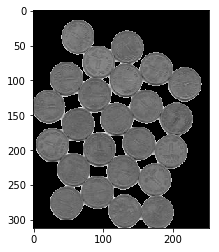

In [16]:
thr, mask = cv2.threshold(gaussian_coins, 155, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
masked_coins = cv2.bitwise_and(coins_gray, coins_gray, mask = mask)
plt.figure()
plt.imshow(masked_coins, cmap = plt.cm.gray) 
print thr